In [1]:
import sys
sys.path.append('../src/')
import importlib
from matplotlib import pylab as plt
%matplotlib inline 

import numpy as np
import torch
import torchvision

import cifar_data
import resnet18
import module2graph
import utils
import dartslike
importlib.reload(utils)
importlib.reload(module2graph)
importlib.reload(dartslike)


<module 'dartslike' from '/home/legin/reps/fast_nas_adapt/notebooks/../src/dartslike.py'>

In [2]:
batch_size = 64
device = 'cpu'
trial_num = 1
epoch_num = 1
lr = 1e-3
batch_seen = 5

In [3]:
trainloader, valloader, testloader = cifar_data.get_dataloaders([8,9], batch_size=batch_size, need_val=True)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
model = resnet18.ResNet18(8).to(device)
model.load_state_dict(torch.load('../data/model_last.ckpt', map_location=device))
model.model.fc = torch.nn.Linear(512, 2)
model = module2graph.GraphInterperterWithBernGamma(model, 1.0)

Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


In [5]:
model.sample_gammas()

tensor([0.6347, 0.6540, 0.4311, 0.5578, 0.9635, 0.9449, 0.6774, 0.8623, 0.8482,
        0.3874, 0.5359, 0.5229, 0.1905, 0.4641, 0.8304, 0.8443, 0.6408, 0.8335,
        0.8949, 0.7547, 0.9329, 0.8930, 0.6835, 0.4174, 0.4314, 0.6616, 0.8216,
        0.7841, 0.8716, 0.7548, 0.6250, 0.6349, 0.4805, 0.4176, 0.6557, 0.8838,
        0.8777, 0.8898, 0.6069, 0.8989, 0.8852, 0.9379, 0.5203, 0.9209, 0.4324,
        0.6243, 0.8642, 0.6745, 0.3565, 0.8284, 0.6874, 0.8584, 0.5573, 0.9355,
        0.6487, 0.9088, 0.6484, 0.8888, 0.8215, 0.7443],
       grad_fn=<SigmoidBackward0>)

In [6]:
importlib.reload(dartslike)
dl = dartslike.DartsLikeTrainer(model)
history = dl.train_loop(trainloader, valloader, testloader, batch_seen, epoch_num, lr, 1e-1, device, 1e-6)
#history += dl.train_loop(trainloader, valloader, testloader, batch_seen, epoch_num, lr, 1e-1, device, 1e-4)

0it [00:00, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.5


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.5


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.5015000104904175


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.8190000057220459


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.8579999804496765


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.8765000104904175


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.746999979019165


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.7835000157356262


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.8585000038146973


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.8840000033378601


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.8544999957084656


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.8019999861717224


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.8209999799728394


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.878000020980835


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.8809999823570251


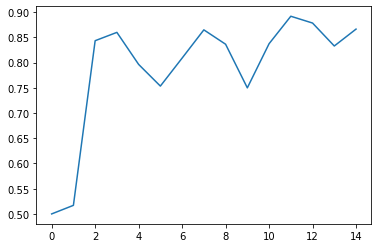

In [7]:
plt.plot(history)


In [8]:
dl.graph_model.gammas

Parameter containing:
tensor([ 0.0921,  2.0464,  3.2494,  1.9368, -1.4647,  1.4464,  1.0995,  1.7137,
        -0.1534,  1.1391,  0.5800,  0.7652,  0.6914,  1.5046,  0.9198,  2.0102,
         0.4540,  0.4100,  2.1994,  2.1189,  2.0128,  1.2166,  1.8581,  2.6244,
        -1.3143,  0.3103, -1.2745,  1.3652, -0.9638,  2.4583,  1.2782,  1.3683,
         0.8024,  1.7670,  2.0541,  2.8071,  2.9083,  5.4618,  0.8284,  1.7208,
         1.5229,  0.6396,  0.0306,  1.6307,  0.1509,  1.6233,  2.9705,  1.1766,
         3.3997,  1.5213,  4.4748,  3.8753,  0.2540,  1.8727,  0.7215,  0.3260,
         3.3124,  1.1204,  2.1952,  4.0060], requires_grad=True)

In [9]:
model.make_gammas_discrete()
model.discrete = True

In [10]:
model.gammas.mean()

tensor(0.9167)

In [11]:
utils.test_loop(model, testloader, device)

  0%|          | 0/32 [00:00<?, ?it/s]

0.5615000128746033

In [12]:
utils.train_loop(model, trainloader, testloader, batch_seen, epoch_num, lr, device)

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.7689999938011169


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.8629999756813049


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.8769999742507935


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.8765000104904175


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.7960000038146973


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.8460000157356262


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.8784999847412109


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.9004999995231628


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.906499981880188


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.8809999823570251


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.8855000138282776


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.9125000238418579


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.890500009059906


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.9179999828338623


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.8999999761581421


[0.7689999938011169,
 0.8629999756813049,
 0.8769999742507935,
 0.8765000104904175,
 0.7960000038146973,
 0.8460000157356262,
 0.8784999847412109,
 0.9004999995231628,
 0.906499981880188,
 0.8809999823570251,
 0.8855000138282776,
 0.9125000238418579,
 0.890500009059906,
 0.9179999828338623,
 0.8999999761581421]

In [13]:
model.gammas

Parameter containing:
tensor([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])